In [1]:
import scipy
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pylab as pl
from math import log
from sklearn import svm
from sklearn.svm import SVC
from sklearn import datasets, linear_model, svm, metrics
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_moons, make_circles, make_classification, make_blobs
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import label_binarize
from sklearn.tree import DecisionTreeClassifier
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.colors import ListedColormap
from collections import Counter
%matplotlib inline  

In [2]:
# functions
def print_out_cross_validation_results(kernel, C, gamma):
    clf = svm.SVC(kernel = kernel, C = C, gamma = gamma)
    scores = cross_val_score(clf, X, y, cv = 5)
    print(kernel + " " + str(C) + " " + gamma + " " + "Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    
def convert_zero_one_to_grey_green(num):
    if num == 0:
        return [0.2, 0.2, 0.2]
    elif num == 1:
        return [0, 1, 0]
        

In [3]:
# obtain data of known orthologs for training
file_known = 'data/known.txt'
dataset = np.loadtxt(file_known, delimiter="\t", usecols = list(range(3,6)))
X = dataset[:,0:2]
y = dataset[:,2]

# scale X (optional)
scaler_whole = preprocessing.StandardScaler().fit(X)
X_transformed = scaler_whole.transform(X)


In [49]:
# cross validation
for kernel in ['rbf', 'sigmoid']: 
    for C in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
        for gamma in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
            print_out_cross_validation_results(kernel, C, gamma)


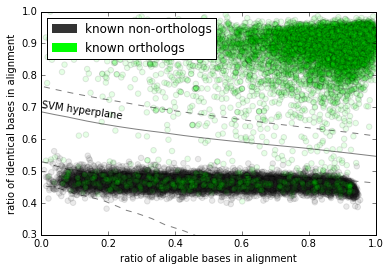

In [4]:
# plot SVM hyplane for known orthologs and non-orthologs
clf = svm.SVC(kernel='rbf', C=1000, gamma=0.1)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], s=30, cmap=plt.cm.Paired,  alpha=0.1, c=[convert_zero_one_to_grey_green(i) for i in y])

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

plt.xlim(0, 1)
plt.ylim(0.3, 1)
plt.xlabel('ratio of aligable bases in alignment')
plt.ylabel('ratio of identical bases in alignment')

grey_patch = mpatches.Circle(1, 1 , color=[0.2, 0.2, 0.2], label='known non-orthologs')
green_patch = mpatches.Circle(1, 1 , color=[0, 1, 0], label='known orthologs')
plt.legend(handles= [grey_patch, green_patch], loc='upper left')
ax.annotate('SVM hyperplane', xy=(0, 0.7), rotation= -8)

# plt.savefig('test.pdf')
# plt.show()


In [5]:
# obtain data of unknown and predict with SVM
file_unknown = 'data/unknown.txt'
dataset2 = np.loadtxt(file_unknown, delimiter="\t", usecols = list(range(3,5)))
X2 = dataset2[:,0:2]

classifier = svm.SVC(kernel='rbf', C= 1000, gamma= 0.1)
classifier.fit(X, y)
predicted = classifier.predict(X2)


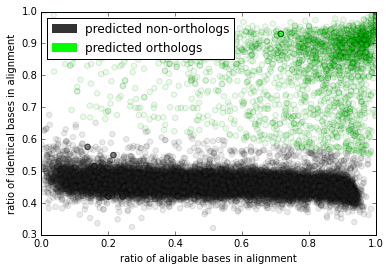

In [6]:
# obtain data of unknown and predict with SVM
plt.scatter(X2[:, 0], X2[:, 1], s=30, cmap=plt.cm.Paired,  alpha=0.1, c=[convert_zero_one_to_grey_green(i) for i in predicted])

plt.xlim(0, 1)
plt.ylim(0.3, 1)
plt.xlabel('ratio of aligable bases in alignment')
plt.ylabel('ratio of identical bases in alignment')

grey_patch = mpatches.Circle(1, 1 , color=[0.2, 0.2, 0.2], label='predicted non-orthologs')
green_patch = mpatches.Circle(1, 1 , color=[0, 1, 0], label='predicted orthologs')
plt.legend(handles= [grey_patch, green_patch], loc='upper left')


In [8]:
# write predicted results to tab-delimited text file
pandaset2 = pd.read_table(file_unknown, sep="\t", header=None) # obtain testing data as pandas data.frame
pandaset2['prediction'] = predicted.astype(int) # Add an extra column of prediction in pandas data.frame
pandaset2.to_csv(file_unknown.replace('txt', 'predicted.txt'),sep="\t",index=False) # write predicted results
